# Sample weights
https://github.com/sunnymnie/bitcoin-printer/tree/main/4-sample-weights

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import random

In [13]:
df = pd.read_csv("cont.csv", index_col=0, parse_dates=True)

In [14]:
df

,trades,pret,target,gain,pct,cont
timestamp,,,,,,
2018-09-01 20:00:00,neo,0.020812,0.005058,0.038342,0.668358,0
2018-09-01 22:00:00,etc,-0.004364,0.003322,0.012289,0.575085,0
2018-09-02 00:00:00,bnb,0.005295,0.011510,0.014187,0.772294,0
2018-09-02 02:00:00,eth,-0.005151,-0.009127,0.010059,0.419270,0
2018-09-02 04:00:00,icx,0.038464,0.012468,0.045982,0.880761,0
...,...,...,...,...,...,...
2021-11-11 02:00:00,chr,0.193714,-0.065037,0.263951,0.739029,0
2021-11-11 04:00:00,mask,0.080998,0.029242,0.164069,0.680263,0
2021-11-11 06:00:00,lrc,0.086893,0.042764,0.099734,0.926804,0


## Determination of sample weight by absolute return attribution

In [15]:
df['w'] = abs(df['target'])
df['w'] *=df.shape[0]/df['w'].sum()

In [16]:
df

,trades,pret,target,gain,pct,cont,w
timestamp,,,,,,,
2018-09-01 20:00:00,neo,0.020812,0.005058,0.038342,0.668358,0,0.155376
2018-09-01 22:00:00,etc,-0.004364,0.003322,0.012289,0.575085,0,0.102026
2018-09-02 00:00:00,bnb,0.005295,0.011510,0.014187,0.772294,0,0.353535
2018-09-02 02:00:00,eth,-0.005151,-0.009127,0.010059,0.419270,0,0.280347
2018-09-02 04:00:00,icx,0.038464,0.012468,0.045982,0.880761,0,0.382965
...,...,...,...,...,...,...,...
2021-11-11 02:00:00,chr,0.193714,-0.065037,0.263951,0.739029,0,1.997676
2021-11-11 04:00:00,mask,0.080998,0.029242,0.164069,0.680263,0,0.898208
2021-11-11 06:00:00,lrc,0.086893,0.042764,0.099734,0.926804,0,1.313552


## Time decay

In [17]:
def get_time_decay(au,clf_last_w=1.,exponent=1):
    # apply optional exponential time decay to observed uniqueness (au)
    # newest observation gets weight=1, oldest observation gets weight=clf_last_w
    clf_w=au.sort_index().cumsum()
    if clf_last_w>=0: slope=((1.-clf_last_w)/clf_w.iloc[-1])**exponent
    else: slope=(1./((clf_last_w+1)*clf_w.iloc[-1]))**exponent
    const=1.-slope*clf_w.iloc[-1]
    clf_w=const+slope*clf_w
    clf_w[clf_w<0]=0
    print(round(const,4), round(slope,4))
    return clf_w

In [18]:
df['td'] = get_time_decay(df['w'].dropna(), clf_last_w=.5, exponent=1)

0.5 0.0


In [19]:
df['wd'] = df.w*df.td

In [20]:
df

,trades,pret,target,gain,pct,cont,w,td,wd
timestamp,,,,,,,,,
2018-09-01 20:00:00,neo,0.020812,0.005058,0.038342,0.668358,0,0.155376,0.500006,0.077689
2018-09-01 22:00:00,etc,-0.004364,0.003322,0.012289,0.575085,0,0.102026,0.500009,0.051014
2018-09-02 00:00:00,bnb,0.005295,0.011510,0.014187,0.772294,0,0.353535,0.500022,0.176775
2018-09-02 02:00:00,eth,-0.005151,-0.009127,0.010059,0.419270,0,0.280347,0.500032,0.140182
2018-09-02 04:00:00,icx,0.038464,0.012468,0.045982,0.880761,0,0.382965,0.500046,0.191500
...,...,...,...,...,...,...,...,...,...
2021-11-11 02:00:00,chr,0.193714,-0.065037,0.263951,0.739029,0,1.997676,0.999582,1.996841
2021-11-11 04:00:00,mask,0.080998,0.029242,0.164069,0.680263,0,0.898208,0.999614,0.897862
2021-11-11 06:00:00,lrc,0.086893,0.042764,0.099734,0.926804,0,1.313552,0.999661,1.313107


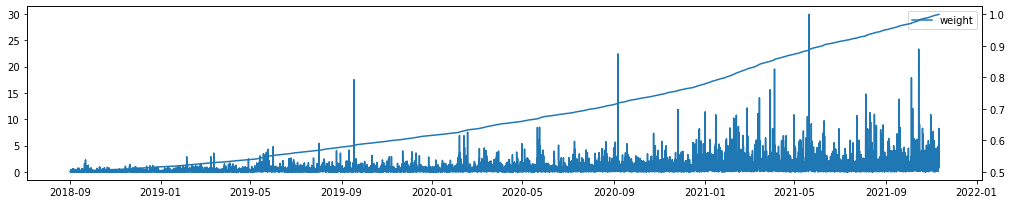

In [21]:
fig, ax = plt.subplots(figsize=(14, 3))
fig.tight_layout()

ax.plot(df.wd, label="weight")
ax1 = ax.twinx()
ax1.plot(df.td, label="time decay")
ax.legend()

# ax3.plot(out.w, label="weight", alpha=.25)
# ax3.plot(out.decay, label = "time decay")
# ax3.plot(out.wd, label = "weight * time decay")
# ax3.legend()
# ax3.set_title("Weight, Time decay, and Weighted time decay")

In [22]:
df.to_csv("weighted_cont.csv")

## Bootstrap

In [98]:
b = random.choices(
            population=df.index,
            weights=df.wd,
            k=len(df)
            )

<AxesSubplot:>

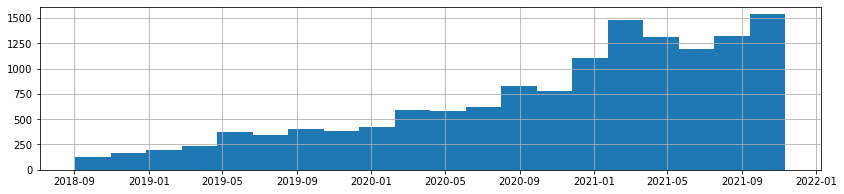

In [99]:

pd.Series(b).hist(figsize=(14,3), bins=20)

# Apply weighted bootstrap

In [100]:
df = df.reindex(b)

In [101]:
df

,trades,pret,target,w,td,wd
timestamp,,,,,,
2021-09-19 16:00:00,data,0.091064,0.084772,2.603862,0.962883,2.507213
2020-06-30 12:00:00,ogn,0.035694,0.013117,0.402889,0.685573,0.276210
2021-07-29 18:00:00,perp,0.069155,0.016136,0.495630,0.928537,0.460211
2021-10-10 10:00:00,vidt,0.331567,0.072869,2.238243,0.975923,2.184352
2019-03-17 00:00:00,hot,0.019924,0.019388,0.595531,0.530163,0.315729
...,...,...,...,...,...,...
2020-07-25 06:00:00,tomo,0.082964,-0.030213,0.928017,0.695955,0.645858
2021-04-26 22:00:00,ctsi,0.266485,0.050192,1.541688,0.871183,1.343092
2021-08-31 08:00:00,celo,0.104054,0.099980,3.070985,0.950550,2.919126


In [102]:
df.drop(['w', 'td', 'wd'], axis=1).to_csv("weighted_cont.csv")